In [1]:

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json

In [2]:
def add_wt_to_df(wildtype_seq, dataframe):
    '''Takes a wildtype sequence and existing dataframe, and adds one entry per amino acid to the dataframe, with the variant score equal to 1.'''
    position_list = []
    substitution_list = []
    score_list = []
    for i, aa in enumerate(wildtype_seq):
        position_list.append(i+1) # we are using 1-based indexing for position in sequence
        substitution_list.append(aa)
        score_list.append(1)
    wildtype_df = pd.DataFrame(
        {'position': position_list,
        'substitution': substitution_list,
        'score': score_list}
        )
    new_df = pd.concat([dataframe, wildtype_df]) # combine existing dataframe with new wildtype dataframe
    return new_df

In [4]:
# Load array

# Option 1: load array from JSON
# replace path with path to your JSON file

with open('test.json', 'r') as fh:
    aa_array = json.load(fh)


# Option 2: Enter array manually
# Required structure (note: must use these exact object names, lowercase):
# [
# {
#     'position': <int>,
# 'substitution': <str>,
# 'score': <flt>
# },
# {
#     'position': <int>,
# 'substitution': <str>,
# 'score': <flt>
# }
# ]

# aa_array = []
    

In [5]:
# convert array to DataFrame
df = pd.DataFrame(aa_array)

In [6]:
# load wildtype sequence

# Option 1: Load from text file containing the sequence on one line
# Replace 'seq_path' with path to your text file
# with open(seq_path, 'r') as fh:
#     wt_seq = fh.read()

# Option 2: Enter wildtype sequence as string here:
wt_seq = 'MARND'


In [7]:
# check that wildtype sequence does not exceed 40 amino acids
seq_len = len(wt_seq)
if seq_len > 40:
    raise Exception('Error: Length of wildtype sequence exceeds limit (40 amino acids).')

In [8]:
# add wildtype entries to df to differentiate them from truly missing values
df = add_wt_to_df(wt_seq, df)

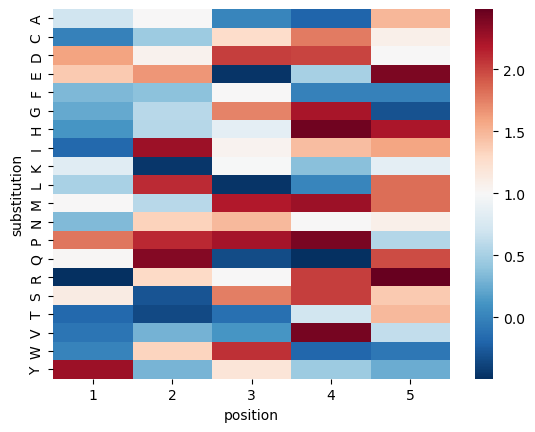

In [9]:
# pivot wide
df_wide = df.pivot(index='substitution', columns='position', values='score')
# mask missing entries
mask = df_wide.isnull()
# generate heatmap
heat_map = sb.heatmap(df_wide, cmap="RdBu_r", center=1, mask=mask)
heat_map.set_facecolor('black') # missing entries show up as black
plt.show()